In [379]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, func

In [380]:
import numpy as np
import pandas as pd

In [381]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [382]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [383]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [384]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [385]:
## We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [386]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [387]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [388]:
#conn = engine.connect()

# Exploratory Climate Analysis

In [420]:
#Precipitation_last12 = engine.execute("Select * From Measurement")
#for record in Precipitation_last12:
    #print(record)
#DataMeasurement_df = pd.read_sql("SELECT * FROM Measurement", conn)

#DataMeasurement_df.head()

In [390]:
#pulling the tables names 
inspector = inspect(engine)
tables = inspector.get_table_names() 
tables

['measurement', 'station']

In [391]:
# columns data types 
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [392]:

engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [393]:
# Total dates
session.query(func.count(Measurement.date)).all()


[(19550)]

In [394]:
 # Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [395]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [396]:
# Calculate the date 1 year ago from the last data point in the database
last_1yr = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("last_1yr: ", last_1yr)

last_1yr:  2016-08-23


In [397]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation_last12 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >=last_1yr).all()

precipitation_last12

#for x in precipitation_last12:
   #print(x)

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [398]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation_last12)
df.head()


,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [399]:
df.set_index('date', inplace=True)
df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


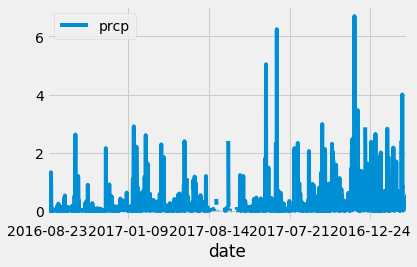

<Figure size 432x288 with 0 Axes>

In [400]:
df.plot()
plt.tight_layout()
plt.show()


plt.savefig("prcp.png")





In [401]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [402]:
# columns data types 
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [403]:
engine.execute('SELECT * FROM Station ').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [404]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [405]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [406]:
#most_active_station

most_active_station = session.query(Measurement.station).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()


for y in most_active_station:
    print(y)

USC00519281


In [407]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


z = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == y).all()
z

[(54.0, 85.0, 71.66378066378067)]

In [408]:
# Choose the station with the highest number of temperature observations.

st = session.query(Measurement.station).\
        group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()

for st_most_tobs in st:
    print(st_most_tobs)


    

USC00519281


In [409]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_last12 = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
filter(Measurement.date >=last_1yr,Measurement.station== st_most_tobs).all()

df_tobs = pd.DataFrame(tobs_last12)
df_tobs.set_index('station', inplace=True)

df_tobs.head()

,tobs,date
station,,
USC00519281,77.0,2016-08-23
USC00519281,77.0,2016-08-24
USC00519281,80.0,2016-08-25
USC00519281,80.0,2016-08-26
USC00519281,75.0,2016-08-27


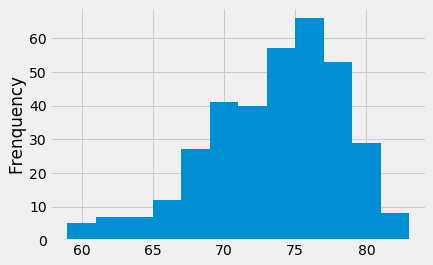

<Figure size 432x288 with 0 Axes>

In [419]:

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#df_tobs.hist()
plt.hist(df_tobs.tobs,bins=12, label='tobs')

plt.ylabel("Frenquency")

plt.show()

plt.savefig("tobs.png")


![precipitation](Images/station-histogram.png)